In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [33]:
df = pd.read_csv('Train.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=True)

/var/folders/wc/g01grcxj65z_db1mfdrp2l140000gn/T/ipykernel_40831/3838792173.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [34]:

# print(len(df['LAT'].unique()))
# print(len(df['LON'].unique()))
# print("\n")
# print(df['LAT'].describe())
# print("====================================")
# print(df['Date'].unique())
# print("\n")
# print(df['Date'].describe())
# print("====================================")
# print(len(df['Date'].unique()))
# print("\n")
# print(df['Date'].describe())
# print("====================================")
# print(df['ID'].unique())
# print("\n")
# print(df['ID'].describe())


In [35]:
# Drop columns ID and Date
# df = df.drop(['ID_Zindi', 'Date', 'ID'], axis=1)
df = df.drop(['ID_Zindi'], axis=1)
print(f"Size of DataFrame: {df.shape}")

Size of DataFrame: (86584, 13)


In [36]:
nan_counts = df.isna().sum()

# Print the number of NaN values alongside the column names
for column, count in nan_counts.items():
    print(f'Column: {column}, NaN Count: {count}')

Column: Date, NaN Count: 0
Column: ID, NaN Count: 0
Column: LAT, NaN Count: 0
Column: LON, NaN Count: 0
Column: Precipitation, NaN Count: 0
Column: LST, NaN Count: 39786
Column: AAI, NaN Count: 12875
Column: CloudFraction, NaN Count: 12875
Column: NO2_strat, NaN Count: 12875
Column: NO2_total, NaN Count: 12875
Column: NO2_trop, NaN Count: 35473
Column: TropopausePressure, NaN Count: 12875
Column: GT_NO2, NaN Count: 4533


In [37]:
df = df.dropna(subset=['GT_NO2'])
df.shape

(82051, 13)

In [38]:
date_counts = df['Date'].value_counts().sort_index()

print(date_counts)

# # Plot the frequency distribution
# plt.figure(figsize=(100, 50))
# date_counts.plot(kind='bar')

# plt.xlabel('Date')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution of Dates')
# plt.xticks(rotation=45)
# plt.show()

Date
2019-01-01    75
2019-01-02    76
2019-01-03    76
2019-01-04    74
2019-01-05    74
              ..
2021-12-27    79
2021-12-28    78
2021-12-29    79
2021-12-30    79
2021-12-31    79
Name: count, Length: 1096, dtype: int64


In [39]:
df.head(100)

Date     ID        LAT        LON  Precipitation  LST       AAI  \
0    2019-01-01   PD01  45.601585  11.903551       0.000000  NaN  0.230527   
57   2019-01-01  X5609  45.396195   9.282700       0.000000  NaN  0.471113   
56   2019-01-01  X5607  45.330361   9.414645       0.000000  NaN  0.313861   
55   2019-01-01  X5603  45.306013   9.485263       0.000000  NaN  0.454544   
54   2019-01-01  X5601  45.081987   9.700788       0.000000  NaN -0.203494   
...         ...    ...        ...        ...            ...  ...       ...   
2525 2019-01-02  X9969  45.842207   9.351658       9.027649  NaN       NaN   
2524 2019-01-02  X9928  45.142541  10.043836      13.929923  NaN -1.595114   
2523 2019-01-02  X9897  45.498227   9.556232       0.000000  NaN -0.726186   
2522 2019-01-02  X9877  45.580263   9.273573       0.000000  NaN -0.121244   
2521 2019-01-02  X9857  44.999546   9.008437       0.000000  NaN  0.310969   

      CloudFraction  NO2_strat  NO2_total  NO2_trop  TropopausePressure  \
0          0.559117   0.000024   0.000117       NaN         14440.82126   
57         0.640860   0.000023   0.000200       NaN         14441.03373   
56         0.671681   0.000023   0.000175       NaN         14443.24936   
55         0.694752   0.000023   0.000291       NaN         14444.19946   
54         0.586172   0.000024   0.000368  0.000183         14444.03338   
...             ...        ...        ...       ...                 ...   
2525            NaN        NaN        NaN       NaN                 NaN   
2524       0.943838   0.000027   0.000878       NaN         16705.05393   
2523       1.000000   0.000026   0.000767       NaN         16704.15492   
2522       1.000000   0.000026   0.000735       NaN         16693.33279   
2521       1.000000   0.000027   0.000716       NaN         16693.96459   

      GT_NO2  
0     31.000  
57    41.375  
56    29.750  
55    33.350  
54    34.375  
...      ...  
2525  41.450  
2524  46.900  
2523  43.175  
2522  63.275  
2521  47.675  

[100 rows x 13 columns]

### SEASONAL VARIATION OF NO2 FOR A PARTICULAR LOCATION

In [43]:
ids = df['ID'].unique()

filtered_df = df[df['ID'] == ids[20]]
filtered_df.shape
filtered_df.head(100)

plt.figure(figsize=(365, 100))
plt.plot(df['Date'], df['GT_NO2'], color='blue', marker='o', linestyle='-')
plt.title('GT_NO2 over Time')
plt.xlabel('Date')
plt.ylabel('GT_NO2')
plt.grid(True)
plt.show()

### KNN FOR LAT/LON

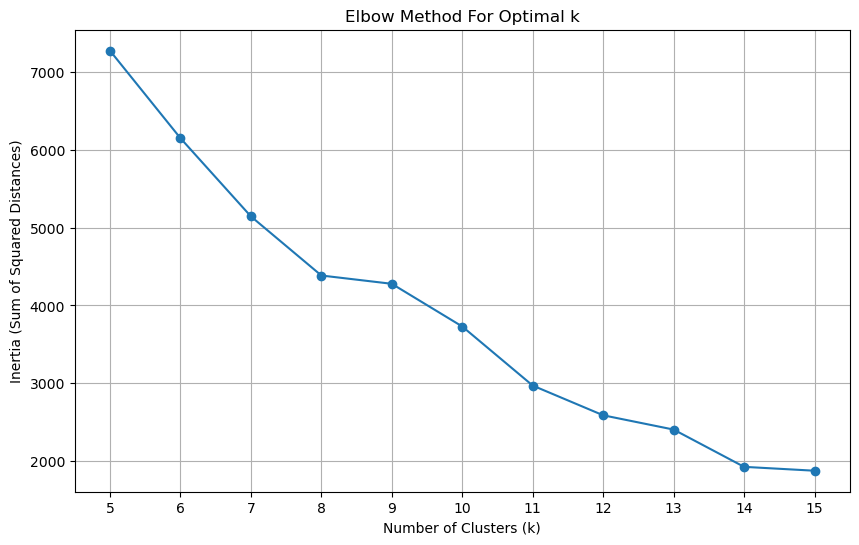

In [10]:
geo = df[['LAT', 'LON']]

# List to hold the sum of squared distances for each k
inertia = []

# Range of cluster numbers to try (5 to 15)
cluster_range = range(5, 16)

# Perform KMeans for each value of k in the range
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(geo)
    inertia.append(kmeans.inertia_)

# Plot the elbow diagram
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

##### Hence we choose 10 Geographical Locations

### KNN FOR DATE

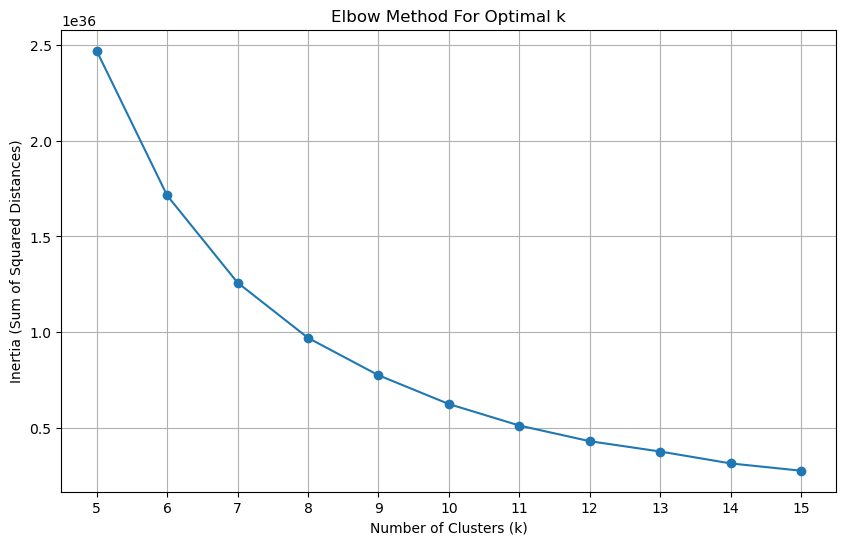

In [11]:
season = df[['Date']]

# List to hold the sum of squared distances for each k
inertia = []

# Range of cluster numbers to try (5 to 15)
cluster_range = range(5, 16)

# Perform KMeans for each value of k in the range
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(season)
    inertia.append(kmeans.inertia_)

# Plot the elbow diagram
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

##### Hence we choose 10 Seasons

### CREATE ID BASED ON GEO LOCATION

In [12]:
X = df[['LAT', 'LON']]
Y = df[['Date']]
kmeans = KMeans(n_clusters=10, random_state=42)
df['GeoLoc'] = kmeans.fit_predict(X)
df['Season'] = kmeans.fit_predict(Y)

In [13]:
df = df.drop(['NO2_strat', 'NO2_trop', 'NO2_total'], axis=1)
df.head(100)

Date     ID        LAT        LON  Precipitation  LST       AAI  \
0    2019-01-01   PD01  45.601585  11.903551       0.000000  NaN  0.230527   
57   2019-01-01  X5609  45.396195   9.282700       0.000000  NaN  0.471113   
56   2019-01-01  X5607  45.330361   9.414645       0.000000  NaN  0.313861   
55   2019-01-01  X5603  45.306013   9.485263       0.000000  NaN  0.454544   
54   2019-01-01  X5601  45.081987   9.700788       0.000000  NaN -0.203494   
...         ...    ...        ...        ...            ...  ...       ...   
2525 2019-01-02  X9969  45.842207   9.351658       9.027649  NaN       NaN   
2524 2019-01-02  X9928  45.142541  10.043836      13.929923  NaN -1.595114   
2523 2019-01-02  X9897  45.498227   9.556232       0.000000  NaN -0.726186   
2522 2019-01-02  X9877  45.580263   9.273573       0.000000  NaN -0.121244   
2521 2019-01-02  X9857  44.999546   9.008437       0.000000  NaN  0.310969   

      CloudFraction  TropopausePressure  GT_NO2  GeoLoc  Season  
0          0.559117         14440.82126  31.000       7       2  
57         0.640860         14441.03373  41.375       6       2  
56         0.671681         14443.24936  29.750       0       2  
55         0.694752         14444.19946  33.350       0       2  
54         0.586172         14444.03338  34.375       0       2  
...             ...                 ...     ...     ...     ...  
2525            NaN                 NaN  41.450       6       2  
2524       0.943838         16705.05393  46.900       5       2  
2523       1.000000         16704.15492  43.175       0       2  
2522       1.000000         16693.33279  63.275       6       2  
2521       1.000000         16693.96459  47.675       3       2  

[100 rows x 12 columns]

### Replacing NaN Values of LST

In [14]:
average_lsts = df.groupby(['Season', 'GeoLoc'])['LST'].mean().reset_index()
average_lsts_dict = average_lsts.set_index(['Season', 'GeoLoc'])['LST'].to_dict()

In [15]:
def replace_nan_lsts(row):
    if pd.isna(row['LST']):
        key = (row['Season'], row['GeoLoc'])
        return average_lsts_dict.get(key, np.nan)  # Use np.nan if key not found
    else:
        return row['LST']

df['LST'] = df.apply(replace_nan_lsts, axis=1)


In [16]:
df.head()

Date     ID        LAT        LON  Precipitation         LST  \
0  2019-01-01   PD01  45.601585  11.903551            0.0  294.071552   
57 2019-01-01  X5609  45.396195   9.282700            0.0  295.421425   
56 2019-01-01  X5607  45.330361   9.414645            0.0  295.044739   
55 2019-01-01  X5603  45.306013   9.485263            0.0  295.044739   
54 2019-01-01  X5601  45.081987   9.700788            0.0  295.044739   

         AAI  CloudFraction  TropopausePressure  GT_NO2  GeoLoc  Season  
0   0.230527       0.559117         14440.82126  31.000       7       2  
57  0.471113       0.640860         14441.03373  41.375       6       2  
56  0.313861       0.671681         14443.24936  29.750       0       2  
55  0.454544       0.694752         14444.19946  33.350       0       2  
54 -0.203494       0.586172         14444.03338  34.375       0       2

### Replacing NaN Values of Tropopause Pressure

In [17]:
average_tp = df.groupby(['Season', 'GeoLoc'])['TropopausePressure'].mean().reset_index()
average_tp_dict = average_tp.set_index(['Season', 'GeoLoc'])['TropopausePressure'].to_dict()

In [18]:
def replace_nan_tp(row):
    if pd.isna(row['TropopausePressure']):
        key = (row['Season'], row['GeoLoc'])
        return average_lsts_dict.get(key, np.nan)  # Use np.nan if key not found
    else:
        return row['TropopausePressure']

df['TropopausePressure'] = df.apply(replace_nan_tp, axis=1)

In [19]:
df.head()

Date     ID        LAT        LON  Precipitation         LST  \
0  2019-01-01   PD01  45.601585  11.903551            0.0  294.071552   
57 2019-01-01  X5609  45.396195   9.282700            0.0  295.421425   
56 2019-01-01  X5607  45.330361   9.414645            0.0  295.044739   
55 2019-01-01  X5603  45.306013   9.485263            0.0  295.044739   
54 2019-01-01  X5601  45.081987   9.700788            0.0  295.044739   

         AAI  CloudFraction  TropopausePressure  GT_NO2  GeoLoc  Season  
0   0.230527       0.559117         14440.82126  31.000       7       2  
57  0.471113       0.640860         14441.03373  41.375       6       2  
56  0.313861       0.671681         14443.24936  29.750       0       2  
55  0.454544       0.694752         14444.19946  33.350       0       2  
54 -0.203494       0.586172         14444.03338  34.375       0       2

### Replacing NaN Values of Cloud Fraction

In [20]:
average_cf = df.groupby(['Season', 'GeoLoc'])['CloudFraction'].mean().reset_index()
average_cf_dict = average_cf.set_index(['Season', 'GeoLoc'])['CloudFraction'].to_dict()

In [21]:
def replace_nan_cf(row):
    if pd.isna(row['CloudFraction']):
        key = (row['Season'], row['GeoLoc'])
        return average_lsts_dict.get(key, np.nan)  # Use np.nan if key not found
    else:
        return row['CloudFraction']

df['CloudFraction'] = df.apply(replace_nan_cf, axis=1)

In [22]:
df.head()

Date     ID        LAT        LON  Precipitation         LST  \
0  2019-01-01   PD01  45.601585  11.903551            0.0  294.071552   
57 2019-01-01  X5609  45.396195   9.282700            0.0  295.421425   
56 2019-01-01  X5607  45.330361   9.414645            0.0  295.044739   
55 2019-01-01  X5603  45.306013   9.485263            0.0  295.044739   
54 2019-01-01  X5601  45.081987   9.700788            0.0  295.044739   

         AAI  CloudFraction  TropopausePressure  GT_NO2  GeoLoc  Season  
0   0.230527       0.559117         14440.82126  31.000       7       2  
57  0.471113       0.640860         14441.03373  41.375       6       2  
56  0.313861       0.671681         14443.24936  29.750       0       2  
55  0.454544       0.694752         14444.19946  33.350       0       2  
54 -0.203494       0.586172         14444.03338  34.375       0       2

### Replacing NaN Values of AAI

In [23]:
average_aai = df.groupby(['Season', 'GeoLoc'])['AAI'].mean().reset_index()
average_aai_dict = average_aai.set_index(['Season', 'GeoLoc'])['AAI'].to_dict()

In [24]:
def replace_nan_aai(row):
    if pd.isna(row['AAI']):
        key = (row['Season'], row['GeoLoc'])
        return average_lsts_dict.get(key, np.nan)  # Use np.nan if key not found
    else:
        return row['AAI']

df['AAI'] = df.apply(replace_nan_aai, axis=1)

In [25]:
df.head()

Date     ID        LAT        LON  Precipitation         LST  \
0  2019-01-01   PD01  45.601585  11.903551            0.0  294.071552   
57 2019-01-01  X5609  45.396195   9.282700            0.0  295.421425   
56 2019-01-01  X5607  45.330361   9.414645            0.0  295.044739   
55 2019-01-01  X5603  45.306013   9.485263            0.0  295.044739   
54 2019-01-01  X5601  45.081987   9.700788            0.0  295.044739   

         AAI  CloudFraction  TropopausePressure  GT_NO2  GeoLoc  Season  
0   0.230527       0.559117         14440.82126  31.000       7       2  
57  0.471113       0.640860         14441.03373  41.375       6       2  
56  0.313861       0.671681         14443.24936  29.750       0       2  
55  0.454544       0.694752         14444.19946  33.350       0       2  
54 -0.203494       0.586172         14444.03338  34.375       0       2

In [26]:
df = df.drop(['GeoLoc', 'Season'], axis=1)

In [27]:
new_order = ['ID', 'Date'] + [col for col in df.columns if col not in ['ID', 'Date']]
df = df[new_order]

In [28]:
df.head(80)

ID       Date        LAT        LON  Precipitation         LST  \
0      PD01 2019-01-01  45.601585  11.903551       0.000000  294.071552   
57    X5609 2019-01-01  45.396195   9.282700       0.000000  295.421425   
56    X5607 2019-01-01  45.330361   9.414645       0.000000  295.044739   
55    X5603 2019-01-01  45.306013   9.485263       0.000000  295.044739   
54    X5601 2019-01-01  45.081987   9.700788       0.000000  295.044739   
...     ...        ...        ...        ...            ...         ...   
2506  X5609 2019-01-02  45.396195   9.282700       4.852253  295.421425   
2505  X5607 2019-01-02  45.330361   9.414645       4.420145  295.044739   
2504  X5603 2019-01-02  45.306013   9.485263       0.000000  295.044739   
2503  X5601 2019-01-02  45.081987   9.700788       0.000000  295.044739   
2502  X5599 2019-01-02  45.620556   9.611738      18.210463  295.044739   

           AAI  CloudFraction  TropopausePressure  GT_NO2  
0     0.230527       0.559117         14440.82126  31.000  
57    0.471113       0.640860         14441.03373  41.375  
56    0.313861       0.671681         14443.24936  29.750  
55    0.454544       0.694752         14444.19946  33.350  
54   -0.203494       0.586172         14444.03338  34.375  
...        ...            ...                 ...     ...  
2506 -1.161167       0.952959         16699.86012  86.675  
2505 -0.749776       1.000000         16706.28130  48.125  
2504 -0.565688       1.000000         16709.54990  58.500  
2503 -0.812168       0.978356         16707.18120  39.575  
2502  0.257532       1.000000         16695.29517  48.925  

[80 rows x 10 columns]

In [29]:
df = df.drop(['ID'], axis=1)
df.to_csv('Train_cleaned.csv', index=False)

In [31]:
dataset = pd.read_csv('Train_cleaned.csv')

dataset = dataset.sort_values(by=['LAT', 'LON', 'Date']).reset_index(drop=True)
dataset.set_index('Date', inplace=True)
dataset.head(100)

LAT        LON  Precipitation         LST       AAI  \
Date                                                                    
2019-01-01  44.924694  10.517502       0.000000  292.880408  0.286079   
2019-01-02  44.924694  10.517502       8.211939  292.880408 -0.579522   
2019-01-03  44.924694  10.517502       0.000000  292.880408 -0.886214   
2019-01-04  44.924694  10.517502       0.000000  294.240000 -0.894068   
2019-01-05  44.924694  10.517502       0.000000  303.260000 -0.987795   
...               ...        ...            ...         ...       ...   
2019-04-10  44.924694  10.517502       0.000000  298.232015 -1.010110   
2019-04-11  44.924694  10.517502       0.000000  291.940000 -1.124225   
2019-04-12  44.924694  10.517502       0.000000  282.020000 -1.125253   
2019-04-13  44.924694  10.517502       0.000000  298.232015 -0.833780   
2019-04-14  44.924694  10.517502       0.000000  298.232015 -0.519453   

            CloudFraction  TropopausePressure  GT_NO2  
Date                                                   
2019-01-01       0.954099         14436.75358  28.525  
2019-01-02       0.970421         16692.01730  35.925  
2019-01-03       0.273483         19279.33913  33.225  
2019-01-04       0.109390         19286.55321  24.275  
2019-01-05       0.000008         19282.00083   6.650  
...                   ...                 ...     ...  
2019-04-10       0.471713         13057.51206  18.700  
2019-04-11       0.007520          9582.60885  20.425  
2019-04-12       0.046947         14434.26542  32.700  
2019-04-13       0.678039         22176.89810  15.050  
2019-04-14       0.943132         19280.93110  14.150  

[100 rows x 8 columns]